# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [163]:
import pandas as pd
import numpy as np
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [164]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
df.describe()
# AS we can see although there is no null values the columns 'pregnancies', 'Glucose'... contain a minimum value of 0 which can not be. we will address it in the cleaning part

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### How the predicted variables are related with the outcome variable

C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


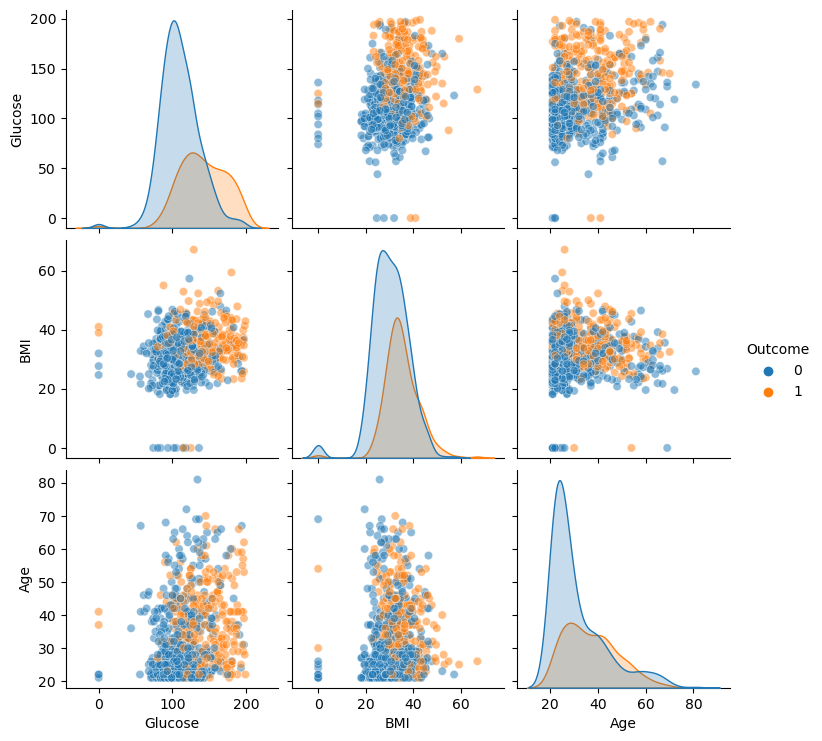

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
pairplot_subset = df[['Glucose', 'BMI', 'Age', 'Outcome']]
sns.pairplot(pairplot_subset, hue='Outcome', plot_kws={'alpha': 0.5})

### Distribution of predictor variables with each other (this is run after the data is cleaned)

C:\Users\Emran Mohammed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


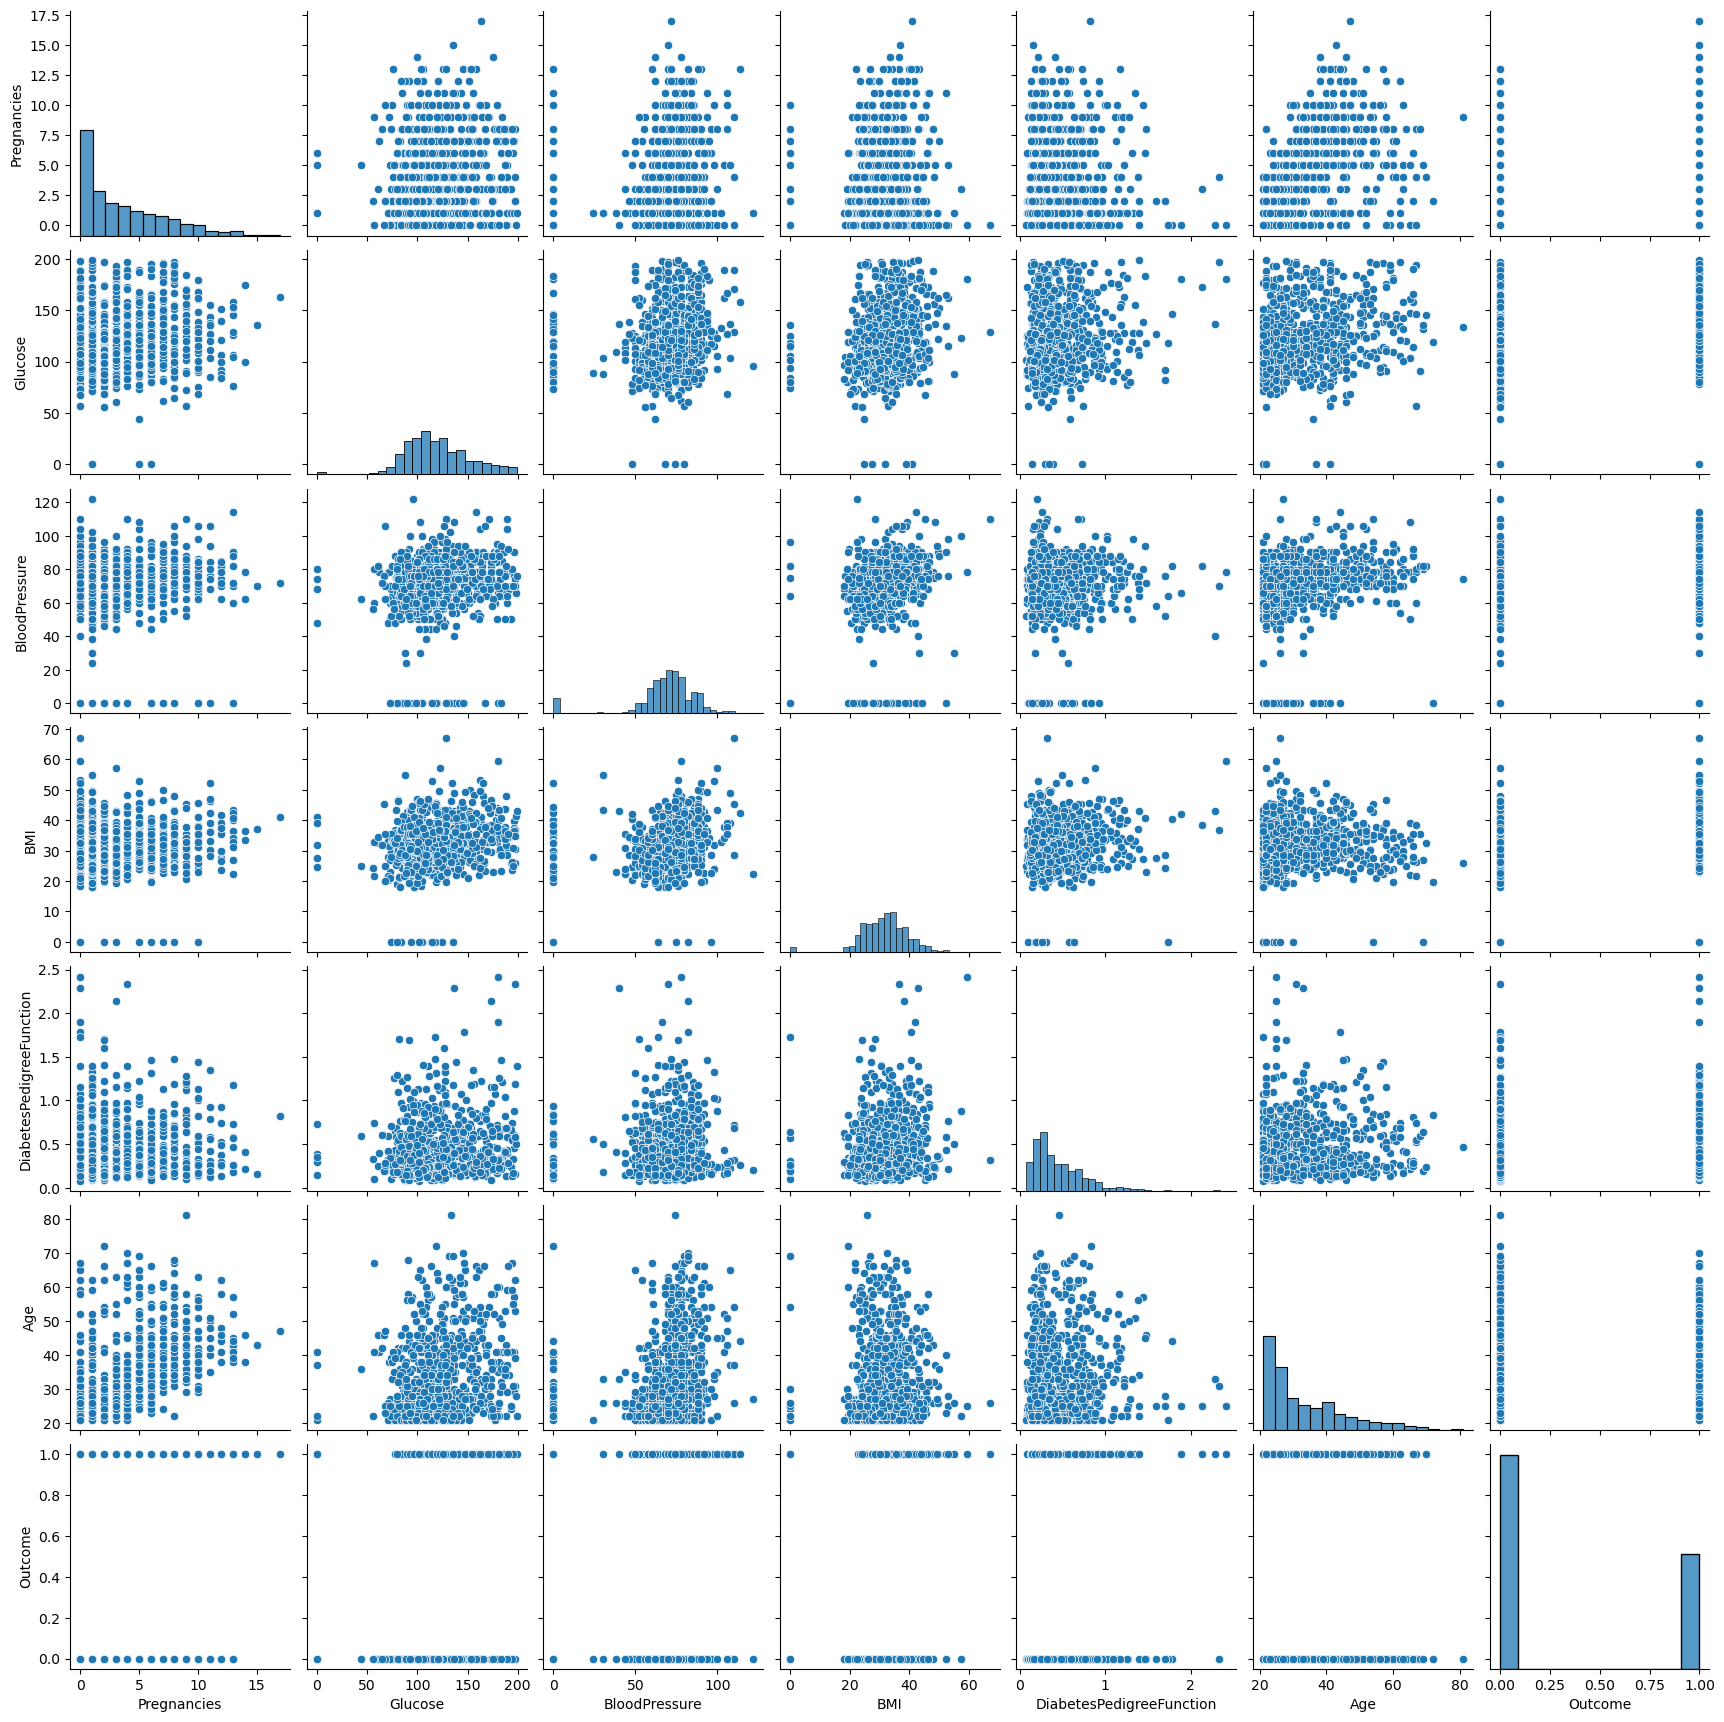

In [45]:
sns.pairplot(df)

### Correlation between different variables

<Axes: >

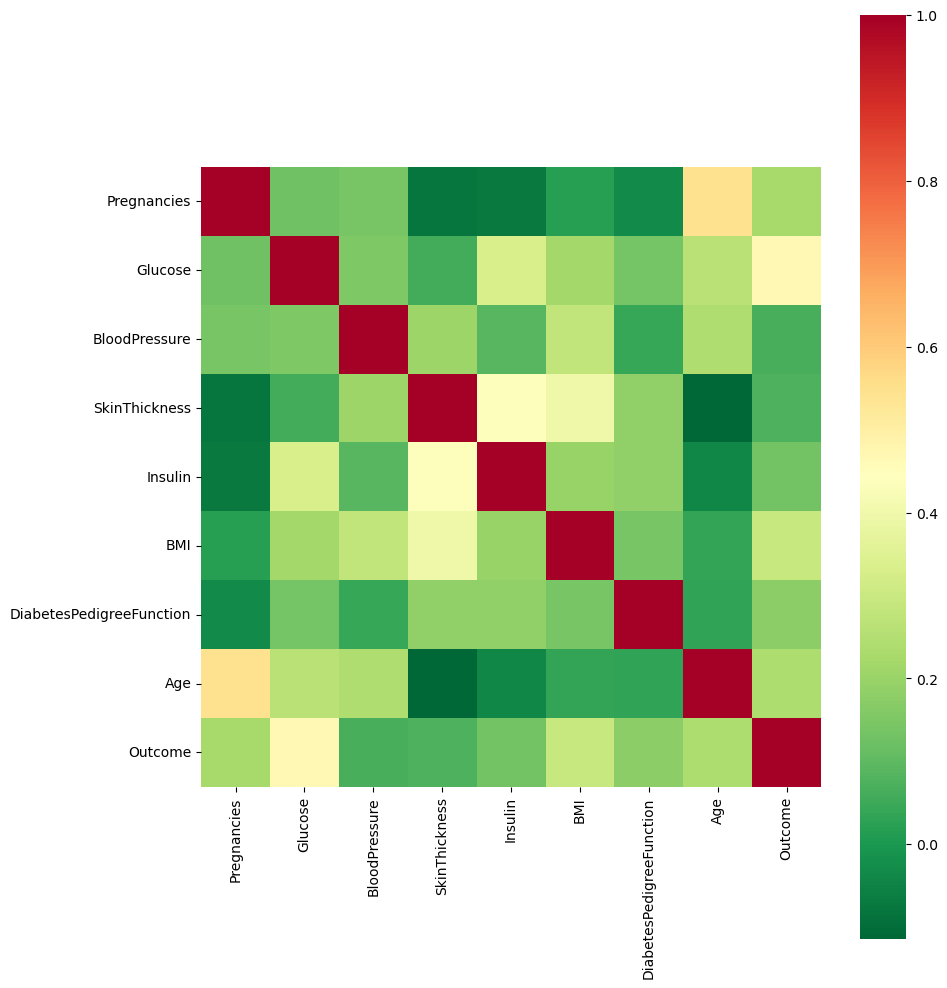

In [169]:
cormat=df.corr(numeric_only=True)
f, ax=plt.subplots(figsize=(10,12))
sns.heatmap(cormat, vmax=1, square=True, cmap="RdYlGn_r")

### Check if there is outlier in the predictor variables

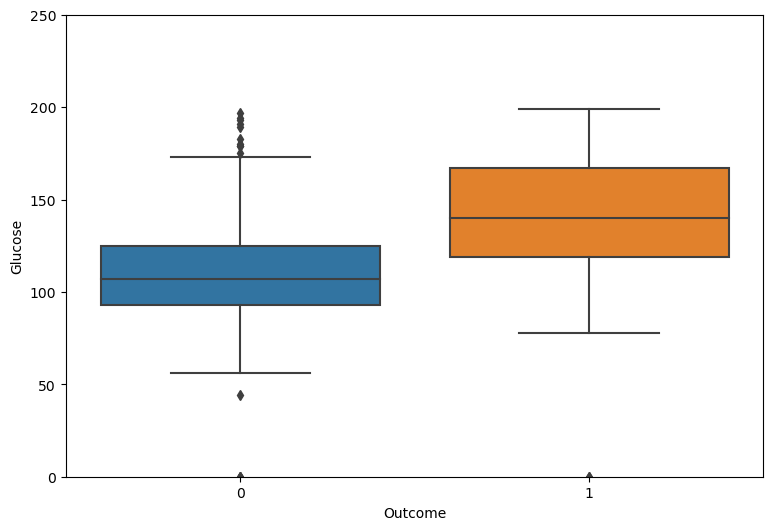

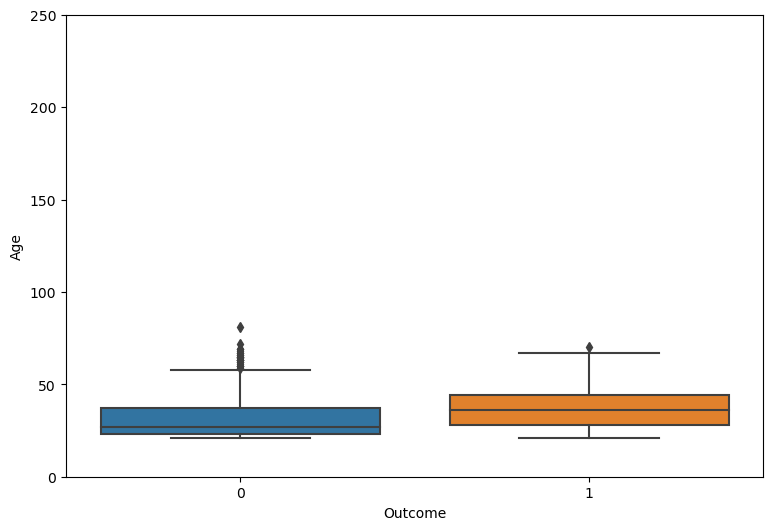

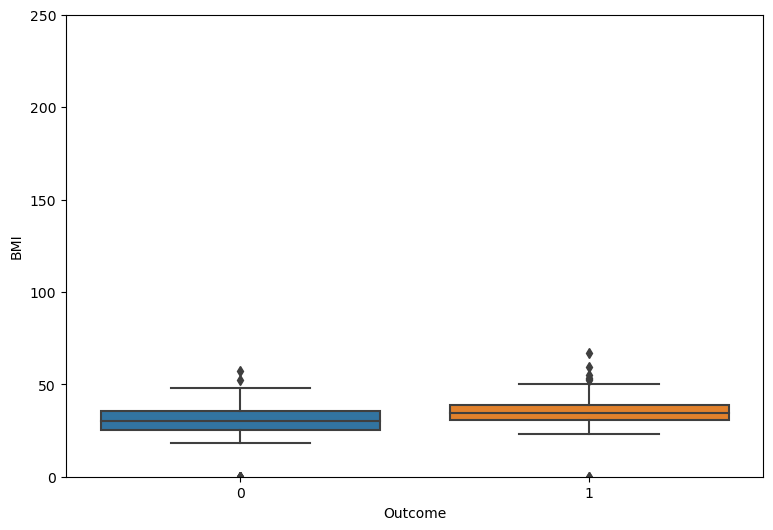

In [131]:
variables=['Glucose', 'Age', 'BMI']
for y in variables:
    f, ax = plt.subplots(figsize=(9, 6))
    fig = sns.boxplot(x='Outcome', y=y, data=df)
    fig.axis(ymin=0, ymax=250)
    
# as we can see

### Average Values

In [34]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [35]:
df.groupby('Outcome')['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

In [36]:
df.groupby('Outcome')['Age'].mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

### Handling missing values

In [170]:
columns_to_replace=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace]=df[columns_to_replace].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [171]:
# As we can see above Skin Thickness and Insulin has alot of missing value so they need to be dropped for the other one's let's replace the missing value with their mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['Glucose'].mean(), inplace=True)
df['BMI'].fillna(df['Glucose'].mean(), inplace=True)
df=df.drop(columns=['SkinThickness', 'Insulin'])
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Scaling (This program is executed after feature engineering)

In [172]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [176]:
from sklearn.preprocessing import StandardScaler

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'AWRF']

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[variables]), columns=variables)

df_scaled.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,AWRF
0,0.639947,0.865108,-0.167080,-0.010724,0.468492,1.425995,-0.004226
1,-0.844885,-1.206162,-0.545218,-0.564799,-0.365061,-0.190672,0.095969
2,1.233880,2.015813,-0.671264,-0.826005,0.604397,-0.105584,0.079285
3,-0.844885,-1.074652,-0.545218,-0.446068,-0.920763,-1.041549,0.386745
4,-1.141852,0.503458,-2.183816,0.741234,5.484909,-0.020496,-0.004145


In [177]:
df=pd.concat([df_scaled, df[['Outcome']]], axis=1)


In [178]:
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,AWRF,Outcome
0,0.639947,0.865108,-0.167080,-0.010724,0.468492,1.425995,-0.004226,1
1,-0.844885,-1.206162,-0.545218,-0.564799,-0.365061,-0.190672,0.095969,0
2,1.233880,2.015813,-0.671264,-0.826005,0.604397,-0.105584,0.079285,1
3,-0.844885,-1.074652,-0.545218,-0.446068,-0.920763,-1.041549,0.386745,0
4,-1.141852,0.503458,-2.183816,0.741234,5.484909,-0.020496,-0.004145,1
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.085012,-0.066132,-0.908682,2.532136,-0.128193,0
764,-0.547919,0.010298,-0.293126,0.242567,-0.398282,-0.531023,-0.096708,0
765,0.342981,-0.022579,-0.167080,-0.596460,-0.685193,-0.275760,0.142235,0
766,-0.844885,0.141808,-0.923356,-0.287761,-0.371101,1.170732,-0.266234,1


### Feature engineering

##### let's add a new column which is very important for the data, that is ge and weight (BMI) are both significant risk factors for diabetes. Combining these could provide a more nuanced risk indicator.

In [175]:
df['AWRF']=df['Age']*df['BMI']

### Handling imbalance data

##### The 'Outcome' variable shows a distribution of approximately 65% for class 0 (non-diabetic) and 35% for class 1 (diabetic). While there is some imbalance, it is not extreme. so I think it is unnecessary to undersample or oversample the data

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

##### I chose two models that I think are the best fit for this specific data which are
               1. Logistic regression
               2. Random Forest

In [179]:
# import statement
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [180]:
# Splitting the data into training and testing sets
X=df.drop(columns='Outcome')
y=df['Outcome']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (614, 7)
X_test shape: (154, 7)


In [182]:
# Creating model
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()

In [183]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [184]:

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [185]:
y_reg_pred=log_reg.predict(X_test)
y_clf_pred=rf_clf.predict(X_test)

In [186]:
eval_metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_reg_pred), accuracy_score(y_test, y_clf_pred)],
    'Precision': [precision_score(y_test, y_reg_pred), precision_score(y_test, y_clf_pred)],
    'Recall': [recall_score(y_test, y_reg_pred), recall_score(y_test, y_clf_pred)],
    'F1 Score': [f1_score(y_test, y_reg_pred), f1_score(y_test, y_clf_pred)],
    'ROC AUC': [roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]), 
                roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])]
}

eval_results = pd.DataFrame(eval_metrics)
eval_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.792208,0.744681,0.636364,0.686275,0.832507
1,Random Forest,0.772727,0.672414,0.709091,0.690265,0.833425


##### Now let's use the hyperparameter tuning for random forest 

In [192]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf, X_train, y_train, cv=5).mean() #initial performance without the test

0.7573903771824604

In [193]:
from sklearn.model_selection import GridSearchCV
param_grid={  'n_estimators': [125, 137, 150], 'max_depth': [None, 5, 7, 8, 9, 10], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [1, 2, 4]}
grid_search=GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [125, 137, 150]},
             scoring='accuracy')

In [194]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 150}

In [195]:
grid_search.best_score_

0.7736505397840864

In [196]:
best_model=grid_search.best_estimator_
y_predd=best_model.predict(X_test)

In [197]:
accuracy_score(y_test, y_predd)

0.7727272727272727

In [200]:
roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

0.8503213957759412

In [201]:
precision_score(y_test, y_predd)

0.6785714285714286

##### Find important features with Random Forest model 

In [126]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [127]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Glucose                     0.257326
AWRF                        0.186311
BMI                         0.145476
DiabetesPedigreeFunction    0.131547
Age                         0.118759
BloodPressure               0.086813
Pregnancies                 0.073768
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

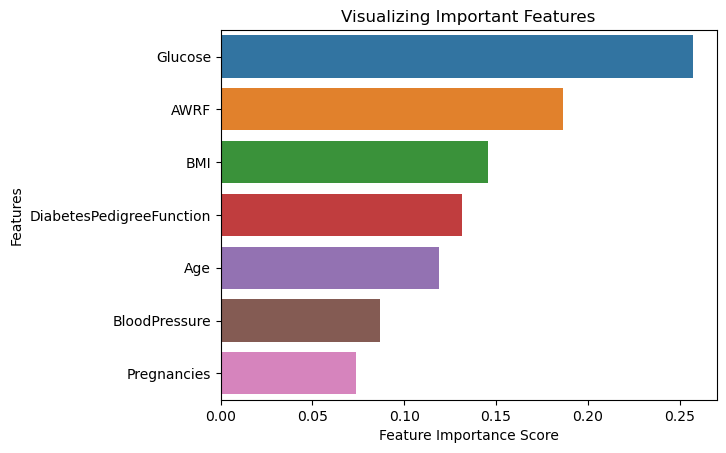

In [128]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### 1. Insights Gained from Exploratory Data Analysis (EDA)
The EDA phase unveiled critical relationships and distributions within the dataset. It underscored the importance of certain features in predicting diabetes. we can see that especially from the visualization that shows How the predicted variables are related with the outcome variable as people tends to be diabetic as the amount of the predictors such as glucose, BMI high as expected.

##### 2. Data Preparation and Insightful Feature Engineering
Preprocessing was essential to guaranteeing data consistency and quality, particularly in addressing missing values and normalizing the data. The dataset was adjusted for precise model training by assigning the means of the variable for the missing values for variables like "Glucose," "BloodPressure," and "BMI" and deciding to remove "SkinThickness" and "Insulin" due to significant missing data and the introduction of the 'Age-Weight Risk Factor (AWRF) allowed for an improved awareness of diabetes risk factors by merging age and BMI

##### 3. Balanced Model Performance with Logistic Regression and Random Forest
The application of Logistic Regression and Random Forest models was particularly effective for this binary classification task. Logistic Regression exhibited a good score in precision and accuracy, making it valuable for this scenarios while, the Random Forest model excelled in recall and ROC AUC performance, indicating its strength in correctly identifying diabetic cases.

##### 4. Significance of hyperparameter tuning
We found that applying grid search to our hyperparameter tuning greatly improved the Random Forest model's performance. We were able to determine the optimal parameter choices, which resulted in significant gains in important measures, most notably the ROC-AUC score. We can say that he tuning process boosted the model's accuracy and reliability.

##### 5. Significance of Feature Importance in Diabetes Prediction
"Glucose," "AWRF," and "BMI" were identified using feature importance analysis as the main predictors, supporting current medical understanding of diabetes risk factors. This data-driven investigation shed light on the impact of specific traits on model projections and offered insightful information about diabetes.